In [1]:
from PIL import Image

import json

from surya.foundation import FoundationPredictor
from surya.detection import DetectionPredictor
from surya.recognition import RecognitionPredictor
from surya.layout import LayoutPredictor
from surya.table_rec import TableRecPredictor

In [ ]:
image = Image.open("2.png")
foundation = FoundationPredictor()
detector = DetectionPredictor()
recognizer = RecognitionPredictor(foundation)
# layout_predictor = LayoutPredictor(foundation)
# table_predictor = TableRecPredictor()

In [4]:
detections = detector([image])
for box in detections[0].bboxes:
    print(f"Координаты: {box}")

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

Координаты: polygon=[[537, 35], [664, 35], [664, 47], [537, 47]] confidence=0.9681397676467896 bbox=[537, 35, 664, 47]
Координаты: polygon=[[109, 39], [209, 39], [209, 52], [109, 52]] confidence=0.8684480786323547 bbox=[109, 39, 209, 52]
Координаты: polygon=[[525, 50], [664, 50], [664, 62], [525, 62]] confidence=0.9573484063148499 bbox=[525, 50, 664, 62]
Координаты: polygon=[[107, 55], [224, 55], [224, 67], [107, 67]] confidence=0.7749229073524475 bbox=[107, 55, 224, 67]
Координаты: polygon=[[521, 67], [665, 67], [665, 79], [521, 79]] confidence=0.9650565385818481 bbox=[521, 67, 665, 79]
Координаты: polygon=[[104, 72], [168, 72], [168, 84], [104, 84]] confidence=0.7990750074386597 bbox=[104, 72, 168, 84]
Координаты: polygon=[[461, 82], [664, 82], [664, 96], [461, 96]] confidence=0.9804727435112 bbox=[461, 82, 664, 96]
Координаты: polygon=[[429, 98], [664, 98], [664, 112], [429, 112]] confidence=0.9820144176483154 bbox=[429, 98, 664, 112]
Координаты: polygon=[[179, 101], [232, 103], [23

In [5]:
ocr_results = recognizer([image], det_predictor=detector)

Recognizing Text: 100%|██████████| 61/61 [00:03<00:00, 17.67it/s]


In [6]:
for line in ocr_results[0].text_lines:
    print(line.polygon, line.text, line.bbox)

[[537.0, 35.0], [664.0, 35.0], [664.0, 47.0], [537.0, 47.0]] ооо "МЦ МЕГИ" [537.0, 35.0, 664.0, 47.0]
[[109.0, 39.0], [209.0, 39.0], [209.0, 52.0], [109.0, 52.0]] ЕТЬ КЛИНИК [109.0, 39.0, 209.0, 52.0]
[[525.0, 50.0], [664.0, 50.0], [664.0, 62.0], [525.0, 62.0]] ОГРН 1030204597455 [525.0, 50.0, 664.0, 62.0]
[[107.0, 55.0], [224.0, 55.0], [224.0, 67.0], [107.0, 67.0]] для взрослых [107.0, 55.0, 224.0, 67.0]
[[521.0, 67.0], [665.0, 67.0], [665.0, 79.0], [521.0, 79.0]] юр. адрес: 450071, РБ, [521.0, 67.0, 665.0, 79.0]
[[104.0, 72.0], [168.0, 72.0], [168.0, 84.0], [104.0, 84.0]] и детей [104.0, 72.0, 168.0, 84.0]
[[461.0, 82.0], [664.0, 82.0], [664.0, 96.0], [461.0, 96.0]] г. Уфа, ул. 50 лет СССР, д. 30/1 [461.0, 82.0, 664.0, 96.0]
[[429.0, 98.0], [664.0, 98.0], [664.0, 112.0], [429.0, 112.0]] +7 (347) 216-33-33, +7 (917) 413-34-33 [429.0, 98.0, 664.0, 112.0]
[[179.0, 101.0], [232.0, 103.0], [231.0, 126.0], [179.0, 123.0]]  [179.0, 101.0, 232.0, 126.0]
[[430.0, 115.0], [664.0, 115.0], [664.

In [7]:
from parse_surya_prediciton import parse_surya_prediciton

In [8]:
parse_surya_prediciton(ocr_results)

['ооо "МЦ МЕГИ" ЕТЬ КЛИНИК ОГРН 1030204597455 для взрослых юр. адрес: 450071, РБ, и детей г. Уфа, ул. 50 лет СССР, д. 30/1 +7 (347) 216-33-33, +7 (917) 413-34-33  www.megi.clinic; e-mail:reg@megi.ru Пациент: КИРЕЕВА Асия Эдуардовна ЭМК №: 42298 Пол: женский, дата рождения: 20.05.2005, возраст: 20  Кровь.Биохимический анализ № 15045351 11.07.2025 11:06:11 Дата и время забора биоматериала Ед. измер. Пред. значение Параметр Значение Рефер. интервал Фолиевая кислота (Вит В9) в 8.0 - 45.3 20.93 нмоль/л сыворотке (А2) Витамин В12/ Цианокобаламин 229 пмоль/л 133 - 675 (A2) 25-ОН Витамин D 30 - 70 норма 33.24 нг/мл (25-гидроксикальциферол, D3) 12 - 30 умеренный дефицит < 12 тяжелый дефицит Магний (AU680) 0.81 <math>0,77 - 1,03</math> ммоль/л Ферритин (AU680) 18.3 10 - 120 мкг/л M Кальций ионизированный 1.02 <math>1,17 - 1,29</math> ммоль/л (AU680) Анализ выполнен на биохимическом анализаторе AU680 Beckman Coulter (США). Исследование выполнил(а): Жукова Альбина Ильгизаровна 11.07.2025 Заведующи

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

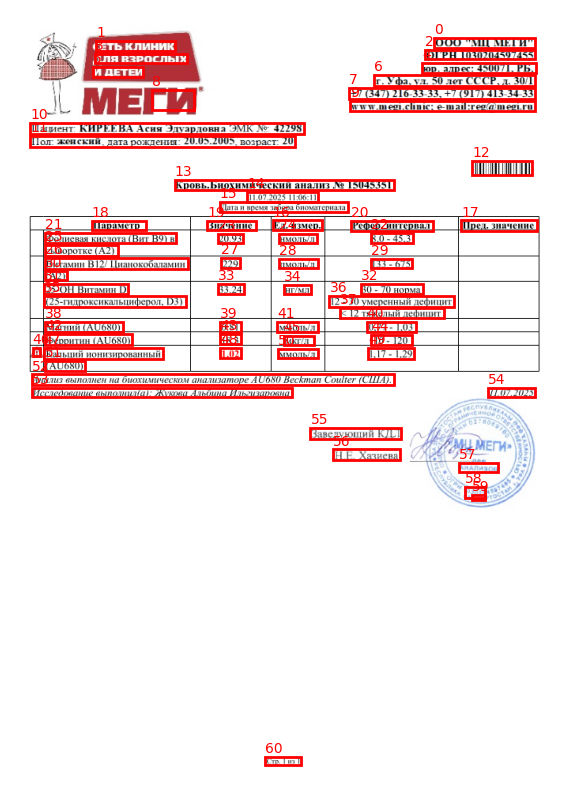

In [10]:
plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.axis('off')
sorted_text_lines = sorted(ocr_results[0].text_lines, key=lambda x: (x.bbox[1], x.bbox[0]))
for i, line in enumerate(sorted_text_lines):
    x_min, y_min, x_max, y_max = line.bbox
    width, height = x_max - x_min, y_max - y_min

    # Draw rectangle
    rect = Rectangle(
        (x_min, y_min), width, height,
        linewidth=2, edgecolor='red', facecolor='none'
    )
    plt.gca().add_patch(rect)

    # Optionally add text above the box
    plt.gca().text(
        x_min, y_min - 5, str(i),
        color='red', fontsize=10,
    )

In [11]:
print("layout")
layout_results = layout_predictor([image])
for layout_box in layout_results[0].bboxes:
    print(f"Тип: {layout_box.label} | Координаты: {layout_box.bbox}")

layout


Recognizing Layout: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

Тип: Picture | Координаты: [174.0, 243.75, 522.0, 731.25]
Тип: PageFooter | Координаты: [171.9609375, 243.75, 521.3203125, 733.154296875]
Тип: PageFooter | Координаты: [172.98046875, 243.75, 521.66015625, 733.154296875]
Тип: PageFooter | Координаты: [172.98046875, 243.75, 521.66015625, 733.154296875]
Тип: PageFooter | Координаты: [172.98046875, 243.75, 521.66015625, 733.154296875]
Тип: PageFooter | Координаты: [172.98046875, 243.75, 521.66015625, 733.154296875]
Тип: PageFooter | Координаты: [172.98046875, 243.75, 521.66015625, 733.154296875]
Тип: PageFooter | Координаты: [172.98046875, 243.75, 521.66015625, 733.154296875]


In [12]:
print("таблицы")
table_results = table_predictor([image])
for table in table_results[0].cells:
    print(f"Таблица обнаружена: {table.bbox}")

таблицы


Recognizing tables: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

Таблица обнаружена: [34.11181640625, 165.673828125, 169.11474609375, 238.3941650390625]
Таблица обнаружена: [168.201416015625, 160.43701171875, 237.572021484375, 238.3941650390625]
Таблица обнаружена: [237.9755859375, 156.62841796875, 320.3876953125, 238.3941650390625]
Таблица обнаружена: [319.83544921875, 155.914306640625, 397.91455078125, 238.3941650390625]
Таблица обнаружена: [397.447265625, 155.67626953125, 564.310546875, 238.3941650390625]
Таблица обнаружена: [564.140625, 155.438232421875, 658.6171875, 238.3941650390625]
Таблица обнаружена: [34.154296875, 238.34209442138672, 169.11474609375, 260.1076126098633]
Таблица обнаружена: [168.201416015625, 238.34209442138672, 237.572021484375, 260.1076126098633]
Таблица обнаружена: [237.9755859375, 238.34209442138672, 320.3876953125, 260.1076126098633]
Таблица обнаружена: [319.83544921875, 238.34209442138672, 397.91455078125, 260.1076126098633]
Таблица обнаружена: [397.447265625, 238.34209442138672, 564.310546875, 260.1076126098633]
Табли

In [13]:
ocr_data = []
for page in ocr_results:
    page_data = {
        "text_lines": [
            {
                "text": line.text,
                "bbox": line.bbox
            } for line in page.text_lines
        ]
    }
    ocr_data.append(page_data)

with open("ocr_results.json", "w", encoding="utf-8") as f:
    json.dump(ocr_data, f, ensure_ascii=False, indent=2)


In [14]:
from src.tg_bot.config import settings
from src.tg_bot.utils.ycloud_client import get_ycloud_sdk

In [20]:
from yandex_cloud_ml_sdk import YCloudML

sdk = YCloudML(
    folder_id="b1g08sdauols3um0k8qc",
    auth="y0__xCU55f0AhjB3RMg0Lrc2BTCzRuzRQUc4ah05BqajttLTaVqQQ",
)

ocr_data_str = (
    ocr_data if isinstance(ocr_data, str)
    else json.dumps(ocr_data, ensure_ascii=False)
)

model = sdk.models.completions("yandexgpt")
model = model.configure(temperature=0.5)
prompt = """Ты — парсер медицинских бланков на русском. На входе JSON с ключом "text_lines", где каждый элемент имеет:
{"text": str, "confidence": float, "bbox": [x0,y0,x1,y1]} — координаты в пикселях.

Цель: извлечь из разметки таблицу анализов и вернуть СТРОГО только CSV-текст в кодировке UTF-8 с заголовком:
date,analysis,result,status

Где:
- date — дата исследования в формате ISO 8601 YYYY-MM-DD (см. правила ниже).
- analysis — название показателя (например, "Глюкоза", "Холестерин ЛПВП").
- result — числовой или строковый результат (оставь как в бланке; десятичный разделитель — точка).
- status — {ok | attention | abnormal | invalid}. 
  ok = в референсе и без тревожных пометок;
  attention = в референсе, но есть пометки типа "см. примечание", "следует контролировать";
  abnormal = вне референсного диапазона или явно указано "повышен/понижен/неверный";
  invalid = бланк отмечает возможную ошибку измерения/недостоверность.

Важные правила извлечения:
1) Сначала нормализуй порядок строк:
   - Сгруппируй элементы в строки по близости по Y (допуск ≈ половина медианной высоты боксов, но ≥3 px).
   - Внутри строки упорядочь элементы по X слева направо.
   - Если заголовок разбит вертикально (напр. "Референсные" + "значения"), расположи их подряд.
2) Определи колонны по заголовкам (синонимы):
   - Исследование|Показатель|Наименование
   - Результат
   - Единицы|Ед.
   - Референсные значения|Норма|Диапазон
   - Комментарий|Примечание
3) Построй строки таблицы анализов, сопоставляя ячейки «исследование–результат–(единицы)–(референс)–(комментарий)».
4) Дату выбирай по приоритету:
   а) "Дата взятия образца" 
   б) иначе "Дата печати результата" 
   в) иначе "Дата поступления образца"
   Возьми только календарную дату (YYYY-MM-DD). Если несколько дат — используй наиболее раннюю из выбранной категории.
5) Нормализация текста:
   - Удали HTML/теги (<br>, <math> и т.п.), многопробелы → один пробел.
   - Десятичные запятые → точки.
6) Вычисление status:
   - Если есть числовой референсный диапазон (напр. "3.0 - 11.0") и числовой result — сравни.
     Внутри/на границе → ok; вне → abnormal.
   - Если нет числового сравнения, используй ключевые слова:
     "повышен/понижен/вне референсных/не соответствует" → abnormal;
     "см. примечание/следует контролировать/пограничное" → attention;
     "возможна лабораторная ошибка/может быть неверным" → invalid.
   - Если ничего не ясно, но есть результат — ok.
7) Укажи одинаковую date для всех строк этого бланка.
8) Формат вывода:
   - Верни ТОЛЬКО CSV-текст. Первая строка — заголовок:
     date,analysis,result,status
   - Значения с запятыми или кавычками заключай в двойные кавычки; внутри поля двойные кавычки удваивай.
   - Одна строка CSV = один анализ.

Входной JSON:"""

payload = f"{prompt}\n{ocr_data_str}"
result = model.run(payload)

#print(f'{result=}')

#print(f'{result[0]=}')

#print(f'{result.alternatives[0].role=}')

# Вот ответ модели
print(f'{result.alternatives[0].text=}')

#print(f'{result.alternatives[0].status=}')


/home/lopatin/Neymark_LabTracker/.venv/lib/python3.13/site-packages/yandex_cloud_ml_sdk/_auth.py:228: UserWarning: Sharing your personal OAuth token is not safe,
and gives anyone access to your cloud infrastructure and data.

Use YandexCloudCLIAuth for personal authentication,
MetadataAuth when running your code inside Yandex Cloud infrastructure or
APIKeyAuth for external-hosted automations.

Please, follow our guide if your OAuth-token is leaked
(https://yandex.cloud/en/docs/iam/operations/compromised-credentials)

  warnings.warn(


result.alternatives[0].text='```csv\ndate,analysis,result,status\n2025-07-11,"Фолиевая кислота (Вит В9) в сыворотке (А2)",20.93,ok\n2025-07-11,"Витамин В12/ Цианокобаламин",229,ok\n2025-07-11,"25-ОН Витамин D",33.24,ok\n2025-07-11,"Магний (AU680)",0.81,ok\n2025-07-11,"Ферритин (AU680)",18.3,ok\n2025-07-11,"Кальций ионизированный",1.02,abnormal\n```'


In [ ]:
sdk = get_ycloud_sdk()
model = sdk.models.completions("yandexgpt")

In [ ]:
from statistics import median
from copy import deepcopy

# ---------- bbox helpers ----------
def _y_center(bb): return (bb[1] + bb[3]) / 2.0
def _height(bb):   return max(1.0, bb[3] - bb[1])
def _x_left(bb):   return bb[0]

def _union_bbox(items):
    xs0, ys0, xs1, ys1 = [], [], [], []
    for it in items:
        x0,y0,x1,y1 = it["bbox"]
        xs0.append(x0); ys0.append(y0); xs1.append(x1); ys1.append(y1)
    return [min(xs0), min(ys0), max(xs1), max(ys1)]

def _v_overlap_ratio(a, b):
    y0a,y1a = a[1], a[3]; y0b,y1b = b[1], b[3]
    inter = max(0.0, min(y1a, y1b) - max(y0a, y0b))
    return inter / max(1.0, min(y1a - y0a, y1b - y0b))

def _x_overlap_ratio(a, b):
    x0a,x1a = a[0], a[2]; x0b,x1b = b[0], b[2]
    inter = max(0.0, min(x1a, x1b) - max(x0a, x0b))
    wa, wb = max(1.0, x1a - x0a), max(1.0, x1b - x0b)
    return inter / min(wa, wb)

# ---------- core ----------
def sort_text_lines(lines, y_tolerance='auto', overlap_threshold=0.5,
                    stitch_vertical_blocks=True,
                    x_overlap_threshold=0.6, stack_vgap_ratio=0.8):
    """
    Сортирует список элементов [{"text":..., "bbox":[x0,y0,x1,y1], ...}] в порядке чтения.
    + Опционально «сшивает» вертикально расположенные элементы внутри одной колонки
      (например, 'Референсные' + 'значения').
    """
    if not lines:
        return []

    med_h = median(_height(l["bbox"]) for l in lines)
    y_tol = max(3.0, 0.5 * med_h) if y_tolerance == 'auto' else float(y_tolerance)
    stack_gap_px = max(2.0, stack_vgap_ratio * med_h)

    prelim = sorted(lines, key=lambda l: (_y_center(l["bbox"]), _x_left(l["bbox"])))

    # --- группировка в строки ---
    groups = []
    for it in prelim:
        yc = _y_center(it["bbox"])
        placed = False
        for g in groups:
            if (_v_overlap_ratio(it["bbox"], g["bbox"]) >= overlap_threshold or
                abs(yc - g["y_center"]) <= y_tol):
                g["items"].append(it)
                g["y_center"] = sum(_y_center(x["bbox"]) for x in g["items"])/len(g["items"])
                g["bbox"] = _union_bbox(g["items"])
                placed = True
                break
        if not placed:
            groups.append({"items":[it], "y_center": yc, "bbox": it["bbox"][:]})

    groups.sort(key=lambda g: g["y_center"])
    for g in groups:
        g["items"].sort(key=lambda it: (_x_left(it["bbox"]), _y_center(it["bbox"])))

    # --- раскладка строк с «сшивкой» вертикальных блоков ---
    if not stitch_vertical_blocks:
        out = []
        for g in groups:
            out.extend(g["items"])
        return out

    result = []
    for i in range(len(groups)):
        cur = groups[i]["items"]
        nxt = groups[i+1]["items"] if i+1 < len(groups) else []
        used_next = [False]*len(nxt)

        for it in cur:
            result.append(it)

            # ищем «дочерние» элементы прямо под ним (та же колонка)
            for j, cand in enumerate(nxt):
                if used_next[j]: 
                    continue
                if _x_overlap_ratio(it["bbox"], cand["bbox"]) >= x_overlap_threshold:
                    vgap = cand["bbox"][1] - it["bbox"][3]  # расстояние между строками
                    if 0 <= vgap <= stack_gap_px:
                        result.append(cand)
                        used_next[j] = True

        # удаляем использованных из следующей строки,
        # чтобы они не повторились позже
        if i+1 < len(groups):
            groups[i+1]["items"] = [cand for j, cand in enumerate(nxt) if not used_next[j]]

    return result

def sort_ocr(ocr, **kwargs):
    """ocr: список страниц [{"text_lines":[...]}]"""
    ocr_out = deepcopy(ocr)
    for page in ocr_out:
        if "text_lines" in page:
            page["text_lines"] = sort_text_lines(page["text_lines"], **kwargs)
    return ocr_out

def sort_ocr_inplace(ocr, **kwargs):
    for page in ocr:
        if "text_lines" in page:
            page["text_lines"] = sort_text_lines(page["text_lines"], **kwargs)

# ---------- utils для просмотра ----------
def preview_lines(lines, max_len=120):
    for i, l in enumerate(lines, 1):
        x0,y0,x1,y1 = l["bbox"]
        t = l.get("text","")
        if len(t) > max_len: t = t[:max_len-1] + "…"
        print(f"{i:>3}. y≈{(y0+y1)/2:7.1f}  x={x0:6.1f}  [{x0:.0f},{y0:.0f},{x1:.0f},{y1:.0f}]  {t}")

In [ ]:
sorted_ocr = sort_ocr(ocr_data, stitch_vertical_blocks=True)

In [ ]:
preview_lines(sorted_ocr[0]["text_lines"])

  1. y≈   45.5  x= 109.0  [109,39,209,52]  ЕТЬ КЛИНИК
  2. y≈   61.0  x= 107.0  [107,55,224,67]  для взрослых
  3. y≈   41.0  x= 537.0  [537,35,664,47]  ооо "МЦ МЕГИ"
  4. y≈   56.0  x= 525.0  [525,50,664,62]  ОГРН 1030204597455
  5. y≈   78.0  x= 104.0  [104,72,168,84]  и детей
  6. y≈   73.0  x= 521.0  [521,67,665,79]  юр. адрес: 450071, РБ,
  7. y≈   89.0  x= 461.0  [461,82,664,96]  г. Уфа, ул. 50 лет СССР, д. 30/1
  8. y≈  113.5  x= 179.0  [179,101,232,126]  
  9. y≈  105.0  x= 429.0  [429,98,664,112]  +7 (347) 216-33-33, +7 (917) 413-34-33
 10. y≈  121.5  x= 430.0  [430,115,664,128]  www.megi.clinic; e-mail:reg@megi.ru
 11. y≈  149.5  x=  25.0  [25,143,372,156]  Пациент: КИРЕЕВА Асия Эдуардовна ЭМК №: 42298
 12. y≈  166.0  x=  25.0  [25,159,361,173]  Пол: женский, дата рождения: 20.05.2005, возраст: 20
 13. y≈  199.5  x= 585.0  [585,191,660,208]  
 14. y≈  221.5  x= 208.0  [208,215,486,228]  Кровь.Биохимический анализ № 15045351
 15. y≈  236.0  x= 300.0  [300,230,390,242]  11.07.2

In [25]:
import pandas as pd
from datetime import date

In [26]:
df = pd.read_csv('analysis_results.csv', names=['user_id', 'date', 'analysis', 'result', 'status'])

In [27]:
df["date"] = pd.to_datetime(df["date"], errors="coerce", dayfirst=True)

/tmp/ipykernel_65242/4022485615.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["date"] = pd.to_datetime(df["date"], errors="coerce", dayfirst=True)


In [14]:
df[df['user_id'] == 0].to_string()

'Empty DataFrame\nColumns: [user_id, date, analysis, result, status]\nIndex: []'

In [28]:
df

,user_id,date,analysis,result,status
0,900113930,2115-11-18,Lactate Dehydrogenase,598 IU/L,ok
1,900113930,2115-11-18,Bilirubin Total,0.6 mg/dL,ok
2,900113930,2115-11-18,Phosphate,2.7 mg/dL,ok
3,900113930,2115-11-18,Anion Gap,13 K/uL,ok
4,900113930,2115-11-18,Bicarbonate,22 mg/dL,ok
5,900113930,2115-11-18,Chloride,101 sec,ok
6,900113930,2115-11-18,Alanine Aminotransferase (ALT),71 q/dL,ok
7,900113930,2115-11-18,Asparate Aminotransferase Her (AST),27 mEq/L,ok
8,900113930,2115-11-18,Alkaline Phosphatase,59 mg/dL,ok
9,900113930,2115-11-18,Calcium Total,8.3,ok


In [20]:
print(df.to_string(index = False))

  user_id       date                            analysis    result status
900113930 2115-11-18               Lactate Dehydrogenase  598 IU/L     ok
900113930 2115-11-18                     Bilirubin Total 0.6 mg/dL     ok
900113930 2115-11-18                           Phosphate 2.7 mg/dL     ok
900113930 2115-11-18                           Anion Gap   13 K/uL     ok
900113930 2115-11-18                         Bicarbonate  22 mg/dL     ok
900113930 2115-11-18                            Chloride   101 sec     ok
900113930 2115-11-18      Alanine Aminotransferase (ALT)   71 q/dL     ok
900113930 2115-11-18 Asparate Aminotransferase Her (AST)  27 mEq/L     ok
900113930 2115-11-18                Alkaline Phosphatase  59 mg/dL     ok
900113930 2115-11-18                       Calcium Total       8.3     ok
900113930 2115-11-18                             Albumin 3.4 mEq/L     ok
900113930 2115-11-18                              Sodium    132 pg     ok


In [21]:
df

,user_id,date,analysis,result,status
0,900113930,2115-11-18,Lactate Dehydrogenase,598 IU/L,ok
1,900113930,2115-11-18,Bilirubin Total,0.6 mg/dL,ok
2,900113930,2115-11-18,Phosphate,2.7 mg/dL,ok
3,900113930,2115-11-18,Anion Gap,13 K/uL,ok
4,900113930,2115-11-18,Bicarbonate,22 mg/dL,ok
5,900113930,2115-11-18,Chloride,101 sec,ok
6,900113930,2115-11-18,Alanine Aminotransferase (ALT),71 q/dL,ok
7,900113930,2115-11-18,Asparate Aminotransferase Her (AST),27 mEq/L,ok
8,900113930,2115-11-18,Alkaline Phosphatase,59 mg/dL,ok
9,900113930,2115-11-18,Calcium Total,8.3,ok


In [24]:

for _, row in df.iterrows():
    analysis_card = (
            f"📅 *Дата:* `{row.get('date', 'N/A').strftime('%Y-%m-%d')}`\n"
            f"🔬 *Анализ:* {row.get('analysis', 'N/A')}\n"
            f"📈 *Результат:* `{row.get('result', 'N/A')}`\n"
            f"🩺 *Статус:* {row.get('status', 'N/A')}\n" +
            "─" * 20 + "\n"
        )
    print(analysis_card)

📅 *Дата:* `2115-11-18`
🔬 *Анализ:* Lactate Dehydrogenase
📈 *Результат:* `598 IU/L`
🩺 *Статус:* ok
────────────────────

📅 *Дата:* `2115-11-18`
🔬 *Анализ:* Bilirubin Total
📈 *Результат:* `0.6 mg/dL`
🩺 *Статус:* ok
────────────────────

📅 *Дата:* `2115-11-18`
🔬 *Анализ:* Phosphate
📈 *Результат:* `2.7 mg/dL`
🩺 *Статус:* ok
────────────────────

📅 *Дата:* `2115-11-18`
🔬 *Анализ:* Anion Gap
📈 *Результат:* `13 K/uL`
🩺 *Статус:* ok
────────────────────

📅 *Дата:* `2115-11-18`
🔬 *Анализ:* Bicarbonate
📈 *Результат:* `22 mg/dL`
🩺 *Статус:* ok
────────────────────

📅 *Дата:* `2115-11-18`
🔬 *Анализ:* Chloride
📈 *Результат:* `101 sec`
🩺 *Статус:* ok
────────────────────

📅 *Дата:* `2115-11-18`
🔬 *Анализ:* Alanine Aminotransferase (ALT)
📈 *Результат:* `71 q/dL`
🩺 *Статус:* ok
────────────────────

📅 *Дата:* `2115-11-18`
🔬 *Анализ:* Asparate Aminotransferase Her (AST)
📈 *Результат:* `27 mEq/L`
🩺 *Статус:* ok
────────────────────

📅 *Дата:* `2115-11-18`
🔬 *Анализ:* Alkaline Phosphatase
📈 *Результат:* 